In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import seaborn as sns

In [8]:
cancer_df = pd.read_csv('cancer dataset.csv', sep=';')

In [9]:
cancer_df.head(10)

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
0,4,1,1,1,2,3,1,1,1,begnin
1,1,5,8,6,5,8,7,10,1,malignant
2,3,2,2,3,2,1,1,1,1,begnin
3,3,1,1,3,8,1,5,8,1,begnin
4,10,4,6,1,2,10,5,3,1,malignant
5,10,5,7,3,3,7,3,3,8,malignant
6,6,3,3,3,3,2,6,1,1,begnin
7,9,10,10,1,10,8,3,3,1,malignant
8,7,5,6,3,3,8,7,4,1,malignant
9,5,3,2,8,5,10,8,1,2,malignant


In [10]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clump       300 non-null    int64 
 1   ucellsize   300 non-null    int64 
 2   ucellshape  300 non-null    int64 
 3   mgadhesion  300 non-null    int64 
 4   sepics      300 non-null    int64 
 5   bnuclei     300 non-null    int64 
 6   bchromatin  300 non-null    int64 
 7   normnucl    300 non-null    int64 
 8   mitoses     300 non-null    int64 
 9   classe      300 non-null    object
dtypes: int64(9), object(1)
memory usage: 23.6+ KB


In [11]:
cancer_df.isnull().sum()

clump         0
ucellsize     0
ucellshape    0
mgadhesion    0
sepics        0
bnuclei       0
bchromatin    0
normnucl      0
mitoses       0
classe        0
dtype: int64

In [12]:
cancer_df.shape

(300, 10)

In [13]:
# Label enconder

from sklearn.preprocessing import LabelEncoder as Lb

encoder = Lb() 


In [15]:
#Transforming the categorical variable to numerical

cancer_df['classe'] = encoder.fit_transform(cancer_df['classe'])

In [16]:
X = cancer_df[['clump',	'ucellsize',	'ucellshape',	'mgadhesion',	'sepics',	'bnuclei',	'bchromatin',	'normnucl',	'mitoses']]
y = cancer_df['classe']

In [17]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)


Y = to_categorical(encoded_Y)

In [18]:
Y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [19]:
#Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

X_model, X_val, y_model, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [20]:
##Lets build our neural network

model = Sequential([

Dense(60, input_dim =9, activation ='relu'),
Dense(2,activation='sigmoid')
])

In [33]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model.fit(X_model, y_model, validation_data= (X_val, y_val), epochs=50, batch_size = 25)

Epoch 1/50
8/8 [==============================] - 2s 63ms/step - loss: 0.0198 - accuracy: 0.9896 - val_loss: 0.2948 - val_accuracy: 0.9167
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.2316 - val_accuracy: 0.9375
Epoch 3/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0180 - accuracy: 0.9948 - val_loss: 0.2293 - val_accuracy: 0.9375
Epoch 4/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.2430 - val_accuracy: 0.9375
Epoch 5/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.2437 - val_accuracy: 0.9375
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.2352 - val_accuracy: 0.9375
Epoch 7/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.2456 - val_accuracy: 0.9375
Epoch 8/50
8/8 [===========

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                600       
                                                                 
 dense_1 (Dense)             (None, 2)                 122       
                                                                 
Total params: 722
Trainable params: 722
Non-trainable params: 0
_________________________________________________________________


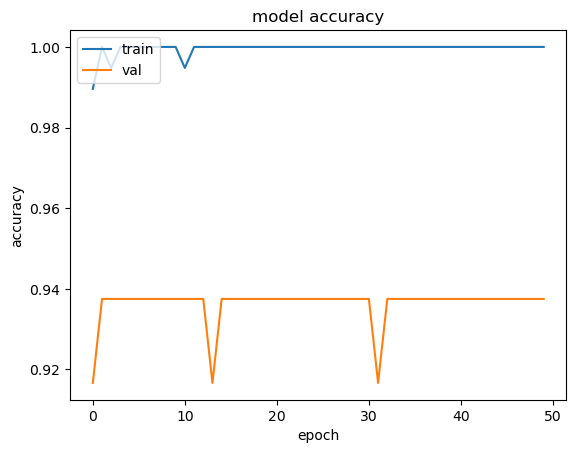

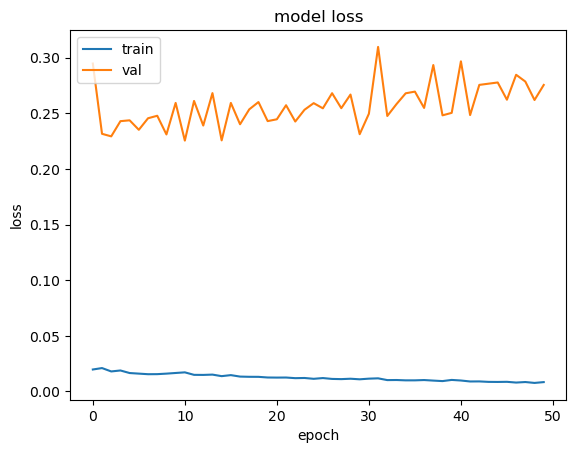

In [35]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [37]:
from sklearn.metrics import accuracy_score
import numpy as np

pred = []

for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))

test = []

for i in range(len(y_test)):
  test.append(np.argmax(y_test[i]))


print(f'The accuracy on test data is {accuracy_score(pred,test)}')

The accuracy on test data is 0.9833333333333333
